In [2]:
import pandas as pd
import numpy as np

In [12]:
def _col_names():
    """Column names of the dataframe"""
    return ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]
text_l = ['logged_in', 'is_host_login', 'is_guest_login','protocol_type','service','flag','land']

#drop_cols = ['protocol_type', 'service', 'flag', 'land']
col_names = _col_names()
df = pd.read_csv("kddcup.data_10_percent_corrected", header=None, names=col_names)

In [13]:
def _encode_text_dummy(df, name):
    """Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1]
    for red,green,blue)
    """
    dummies = pd.get_dummies(df.loc[:,name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df.loc[:, dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [14]:
for name in text_l:
    _encode_text_dummy(df, name)

In [151]:
df_train = pd.read_csv('df_train.csv').drop('Unnamed: 0',axis =1)

In [174]:
user = (df_train.duration-5).abs().sort_values().head(1).index
df_train.loc[user]

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,logged_in-0,logged_in-1,is_host_login-0,is_guest_login-0,is_guest_login-1
9534,5,105,147,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1,1,0,1,1,0


In [7]:
df.drop(drop_cols,axis=1,inplace=True)

In [15]:
df.is_host_login.value_counts()

0    494021
Name: is_host_login, dtype: int64

In [ ]:
smurf&              0.568377\\
neptune&            0.216997\\
normal&             0.196911\\
back&               0.004459\\
satan&              0.003216\\
ipsweep&            0.002524\\
portsweep&          0.002105\\
warezclient&        0.002065\\
teardrop&           0.001982\\
pod&                0.000534\\
nmap&               0.000468\\
guess_passwd&       0.000107\\
buffer_overflow&    0.000061\\
land&               0.000043\\
warezmaster&        0.000040\\
imap&               0.000024\\
rootkit&            0.000020\\
loadmodule&         0.000018\\
ftp_write&          0.000016\\
multihop&           0.000014\\
phf&                0.000008\\
perl&               0.000006\\
spy&                0.000004\\

In [21]:
df.label.value_counts(1)

smurf.              0.568377
neptune.            0.216997
normal.             0.196911
back.               0.004459
satan.              0.003216
ipsweep.            0.002524
portsweep.          0.002105
warezclient.        0.002065
teardrop.           0.001982
pod.                0.000534
nmap.               0.000468
guess_passwd.       0.000107
buffer_overflow.    0.000061
land.               0.000043
warezmaster.        0.000040
imap.               0.000024
rootkit.            0.000020
loadmodule.         0.000018
ftp_write.          0.000016
multihop.           0.000014
phf.                0.000008
perl.               0.000006
spy.                0.000004
Name: label, dtype: float64

In [29]:
df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
df

,lab,val
0,A,10
1,B,30
2,C,20


In [39]:
xx

NameError: name 'xx' is not defined

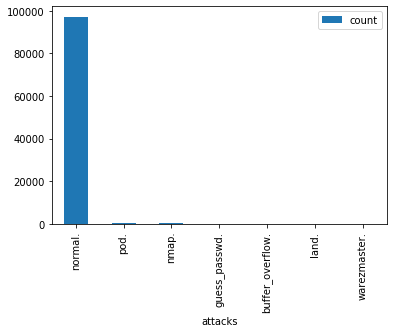

In [40]:
ax = xx.plot.bar(x='attacks', y='count', rot=90)

In [3]:
data = pd.read_csv('kddcup.data_10_percent_corrected',header=None, names=col_names)

NameError: name 'col_names' is not defined

In [24]:
xx

,ratios
normal.,97278
pod.,264
nmap.,231
guess_passwd.,53
buffer_overflow.,30
land.,21
warezmaster.,20


In [25]:

ax = data[data.label.isin(labels)].label.plot.hist(bins=12, alpha=0.5)

TypeError: Empty 'DataFrame': no numeric data to plot

In [21]:
data.label.value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: label, dtype: int64

In [50]:
labels = ['normal.',
'pod.'    ,        
'nmap.'    ,       
'guess_passwd.',   
'buffer_overflow.',
'land.'         ,
'warezmaster.'  ]

In [53]:
xx = data[data.label.isin(labels)].label.value_counts(1)
xx.name= 'count'
xx = xx.to_frame().reset_index()
xx = xx.rename(columns={'index':'attacks'})

In [58]:
xx

,attacks,count
0,normal.,0.993677
1,pod.,0.002697
2,nmap.,0.002360
3,guess_passwd.,0.000541
4,buffer_overflow.,0.000306
5,land.,0.000215
6,warezmaster.,0.000204


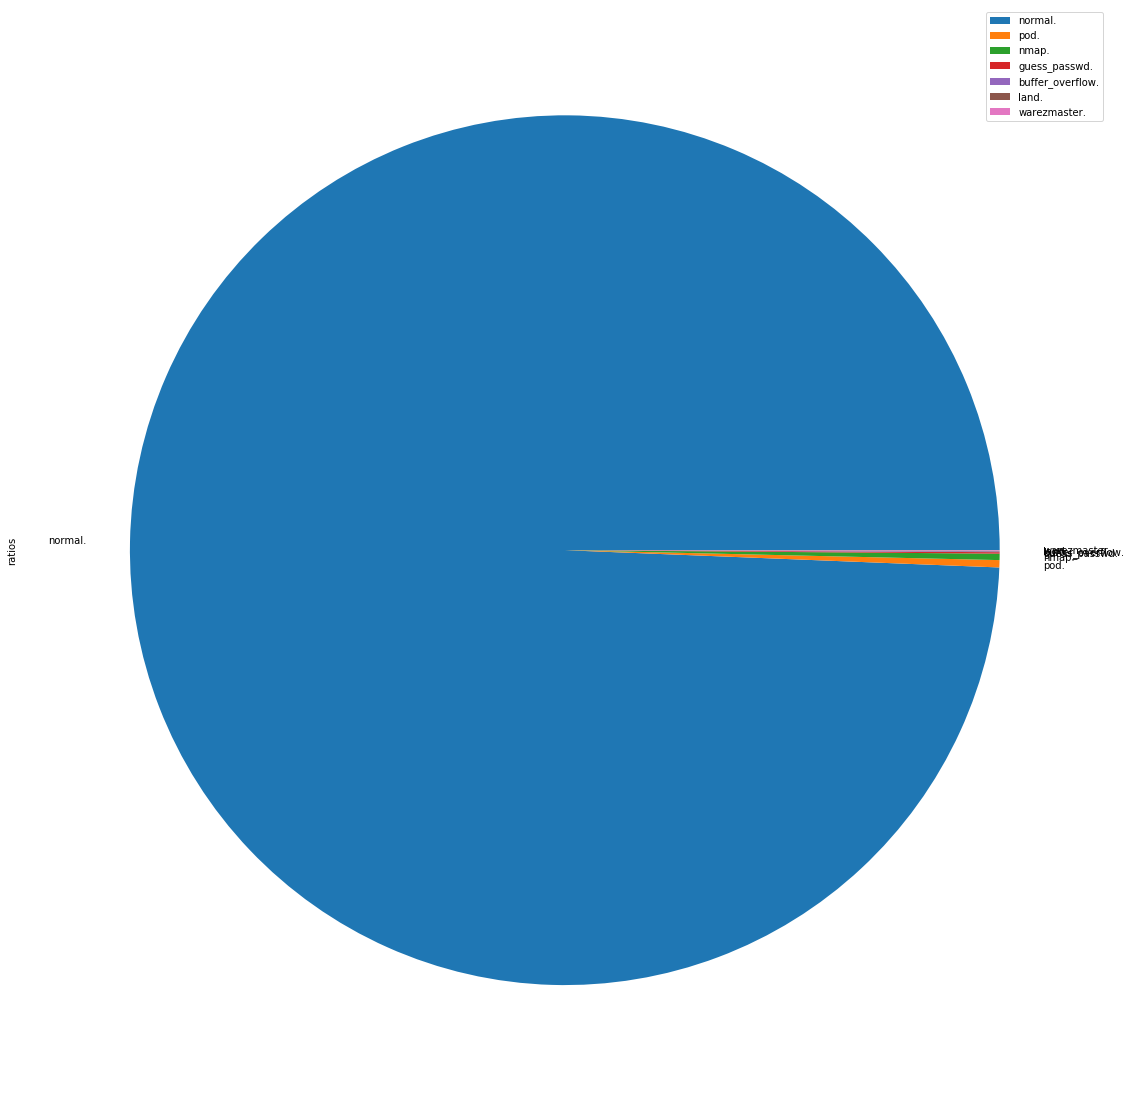

In [19]:
xx.plot.pie(y='ratios', figsize=(20, 20))

In [15]:
plot

In [29]:
import tensorflow as tf
import tensorflow_probability as tfp
import keras
tfpl = tfp.layers
tfk = tf.keras
tfkl = tf.keras.layers

Using TensorFlow backend.


In [ ]:
tfp.layers.IndependentNormal(39,input = net,
                                  # units = 39,
                                  # kernel_initializer=init_kernel,
                                  name='pl')

In [ ]:
tfkl.InputLayer(input_shape= z_inp.shape)

In [48]:
### kdd
df_train = pd.read_csv('df_train.csv').drop('Unnamed: 0',axis=1)
df_test = pd.read_csv('df_test.csv').drop('Unnamed: 0',axis=1)

y_train = df_train.label
y_test = df_test.label

x_train = df_train.drop('label',axis=1)
x_test = df_test.drop('label',axis=1)

In [3]:
### credit card
js = '/Users/oguzkaplan/Documents/repo/thesis/cc_fraud_data/test_cc.csv'
df_test = pd.read_csv(js)
js = '/Users/oguzkaplan/Documents/repo/thesis/cc_fraud_data/train_cc.csv'
df_train = pd.read_csv(js)

df_train = df_train.rename(columns = {'Class':'label'})
df_test = df_test.rename(columns = {'Class':'label'})

df_test = df_test.rename(columns={'Unnamed: 0': 'id'}).set_index('id')
df_train = df_train.rename(columns={'Unnamed: 0': 'id'}).set_index('id')

df_train.Amount = df_train.Amount.replace([-np.inf,np.inf],0)
df_test.Amount = df_test.Amount.replace([-np.inf,np.inf],0)

y_train = df_train.label
y_test = df_test.label

x_train = df_train.drop('label',axis=1)
x_test = df_test.drop('label',axis=1)



In [7]:
from sklearn.model_selection import train_test_split
X = x_test.copy()
y = y_test.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [15]:
y_test.value_counts(1)

0    0.805958
1    0.194042
Name: label, dtype: float64

In [13]:
y_train.value_counts()

0    990
1    251
Name: label, dtype: int64

In [4]:
import time

In [5]:
xd = time.time()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)

time.time()-xd

1.309668779373169

In [6]:
xd = time.time()
from sklearn.svm import OneClassSVM
clf1 = OneClassSVM().fit(x_train_sc)
print(time.time()-xd)

4816.729974031448


In [49]:
res = pd.Series(clf1.score_samples(x_test_sc),index = x_test.index)
res.name = 'ocsvm'
res = res.to_frame()
res.index = x_test.index
res['true'] = y_test

In [50]:
#res.loc[res.ocsvm==1,'ocsvm']=0
#res.loc[res.ocsvm==-1,'ocsvm']=1

In [51]:
#res.true = np.abs(res.true-1)

In [52]:
test_ids = pd.read_csv('val_test_set.csv')['Unnamed: 0']

In [54]:
res_test = res[res.index.isin(test_ids)]
res_val = res[res.index.isin(test_ids)==False]

In [56]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
comp1 = pd.DataFrame(index = range(100),columns = ['prec','recall','acc','f1'])
for i in range(100):
    res_val['label'] = 0
    res_val.loc[res_val['ocsvm']>res_val['ocsvm'].quantile(i*0.01),'label'] =1
    comp1.loc[i,'prec'] = precision_score(res_val['true'],res_val.label).round(3)
    comp1.loc[i,'recall'] = recall_score(res_val['true'],res_val.label).round(3)
    comp1.loc[i,'acc'] = accuracy_score(res_val['true'],res_val.label).round(3)
    comp1.loc[i,'f1'] = f1_score(res_val['true'],res_val.label).round(3)
    comp1.loc[i,'thres_valhold'] = res_val['ocsvm'].quantile(i*0.01)
comp1.sort_values('f1',ascending=False)

/Users/oguzkaplan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/oguzkaplan/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,prec,recall,acc,f1,thres_valhold
61,0.967,0.788,0.885,0.868,2.048301e+04
59,0.941,0.805,0.882,0.868,1.976934e+04
60,0.952,0.795,0.882,0.866,2.022336e+04
62,0.979,0.774,0.884,0.865,2.111046e+04
58,0.927,0.811,0.879,0.865,1.949374e+04
63,0.991,0.764,0.884,0.863,2.141262e+04
57,0.914,0.818,0.876,0.863,1.939479e+04
64,1,0.751,0.88,0.858,2.200823e+04
55,0.885,0.832,0.868,0.858,1.925657e+04
56,0.893,0.818,0.866,0.854,1.933022e+04


In [57]:
res_test

,ocsvm,true
2,11122.539320,1
3,23366.630994,1
5,24535.284776,1
6,24680.757717,1
7,23847.198115,1
9,20034.670193,1
10,25446.910146,1
12,24067.290762,1
23,23038.090097,1
25,20632.303507,1


In [59]:
threshold = comp1.sort_values('f1',ascending=False).head(1).thres_valhold.iloc[0]
res_test['pred'] = 0
res_test.loc[res_test['ocsvm']>threshold,'pred'] = 1

print('prec: ',precision_score(res_test['true'],res_test.pred).round(3))
print('recall: ',recall_score(res_test['true'],res_test.pred).round(3))
print('acc: ',accuracy_score(res_test['true'],res_test.pred).round(3))
print('f1: ',f1_score(res_test['true'],res_test.pred).round(3))

prec:  0.957
recall:  0.752
acc:  0.853
f1:  0.842


/Users/oguzkaplan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/oguzkaplan/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [39]:
xx = res.ocsvm.quantile(99*0.01)
res[res.ocsvm>xx]

ModuleNotFoundError: No module named 'GraphDef'

In [7]:
import os
import sys

from google.protobuf import text_format

import tensorflow as tf
from tensorflow.python.platform import gfile


with tf.Session() as sess:
    model_filename = '/Users/oguzkaplan/Desktop/graph.pbtxt'
    with gfile.FastGFile(model_filename, 'r') as f:
        graph_def = tf.GraphDef()
        text_format.Merge(f.read(), graph_def)
        g_in = tf.import_graph_def(graph_def)
LOGDIR = os.path.join(os.path.dirname(model_filename))
train_writer = tf.summary.FileWriter(LOGDIR)
train_writer.add_graph(sess.graph)

In [26]:
x_inp = df.copy()
init_kernel = tf.contrib.layers.xavier_initializer()

def leakyReLu(x, alpha=0.1, name='leaky_relu'):
    """ Leaky relu """
    if name:
        with tf.variable_scope(name):
            return _leakyReLu_impl(x, alpha)
    else:
        return _leakyReLu_impl(x, alpha)

def _leakyReLu_impl(x, alpha):
    return tf.nn.relu(x) - (alpha * tf.nn.relu(-x))

with tf.variable_scope('discriminator'):#, reuse=True, custom_getter=getter):
    # D(x)
    name_x = 'x_layer_1'
    with tf.variable_scope(name_x):
        x = tf.layers.dense(,
                      units=64,
                      kernel_initializer=init_kernel,
                        name='fc')
        x = leakyReLu(x)
        x = tf.layers.dropout(x, rate=0.2, name='dropout', training=is_training)

    # D(z)
    name_z = 'z_fc_1'
    with tf.variable_scope(name_z):
        z = tf.layers.dense(z_inp, 64, kernel_initializer=init_kernel)
        z = leakyReLu(z)
        z = tf.layers.dropout(z, rate=0.2, name='dropout', training=is_training)

    # D(x,z)
    y = tf.concat([x, z], axis=1)

    name_y = 'y_fc_1'
    with tf.variable_scope(name_y):
        y = tf.layers.dense(y,
                            64,
                            kernel_initializer=init_kernel)
        y = leakyReLu(y)
        y = tf.layers.dropout(y, rate=0.2, name='dropout', training=is_training)

    intermediate_layer = y

    name_y = 'y_fc_logits'
    with tf.variable_scope(name_y):
        logits = tf.layers.dense(y,
                                 1,
                                 kernel_initializer=init_kernel)


TypeError: Expected binary or unicode string, got 0

In [149]:
import netron
netron.start( '/Users/oguzkaplan/Desktop/cc_newloss/cross-e/0.1/42/graph.pbtxt')


Stopping http://localhost:8080
Serving '/Users/oguzkaplan/Desktop/cc_newloss/cross-e/0.1/42/graph.pbtxt' at http://localhost:8080


In [61]:
 np.std([5.7635,
 5.2377,
 5.3803,
 5.2880,
 5.1849,
 5.1615,
 5.3995,
 5.0265,
 5.1219,
 5.1080,
 5.2426,
 5.3946,
 5.1291,
 5.1144,
 5.3461,
 5.5196,
 5.1159,
 5.0959,
 4.9861])

0.18489237941775463

In [16]:
a = 'Ali ata bak'

In [18]:
liste = a.split(' ')

In [19]:
liste

['Ali', 'ata', 'bak']